In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/Chapter6_PVT Data.csv')
df

,Temperature,Rs,Gas Gravity,Oil API,Pbp
0,124.224811,983.507201,1.095773,27.378218,3094.473796
1,105.670201,1118.311927,1.264539,30.497141,2593.138497
2,220.984279,255.071907,0.840619,37.779038,1118.302194
3,244.728321,48.801731,1.109872,35.049613,232.011706
4,104.153879,75.385002,0.889540,24.543380,421.236666
...,...,...,...,...,...
244,104.019931,273.074402,0.830617,31.615851,1136.336659
245,153.868480,145.006939,0.855444,27.539107,783.000819
246,134.831647,91.510982,0.988292,31.875268,397.326261
247,199.504544,238.578634,0.963525,34.880735,940.892103


In [ ]:
# separate feature and target matrix

X = df.drop(['Pbp'], axis=1)
y = df['Pbp']

In [ ]:
# train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# standarisasi

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.neural_network import MLPRegressor

# model = MLPRegressor(hidden_layer_sizes=(20, 20),
#                      activation='relu',
#                      solver='adam')
model = MLPRegressor()
model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor()

In [ ]:
y_pred = model.predict(X_test_scaled)

from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

-1.9352874038909214

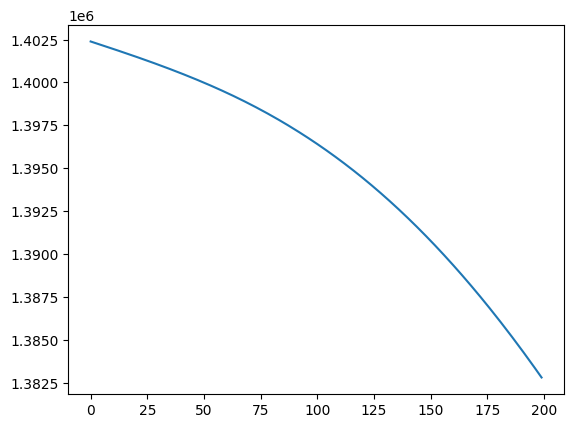

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model.loss_curve_)

In [ ]:
model.coefs_[0]

### Hyperparameter Tuning